<a href="https://colab.research.google.com/github/Ashwath26112006/CNN-For-Image-Classification-/blob/main/CNN_For_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.3367 - loss: 1.7884 - val_accuracy: 0.5350 - val_loss: 1.2684
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.5667 - loss: 1.2141 - val_accuracy: 0.6089 - val_loss: 1.0962
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6257 - loss: 1.0583 - val_accuracy: 0.6371 - val_loss: 1.0304
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6688 - loss: 0.9458 - val_accuracy: 0.6629 - val_loss: 0.9581
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6963 - loss: 0.8640 - val_accuracy: 0.6688 - val_loss: 0.9436
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7184 - loss: 0.8090 - val_accuracy: 0.6818 - val_loss: 0.9146
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7337 - loss: 0.7529 - val_accuracy: 0.6896 - val_loss: 0.9144
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7468 -

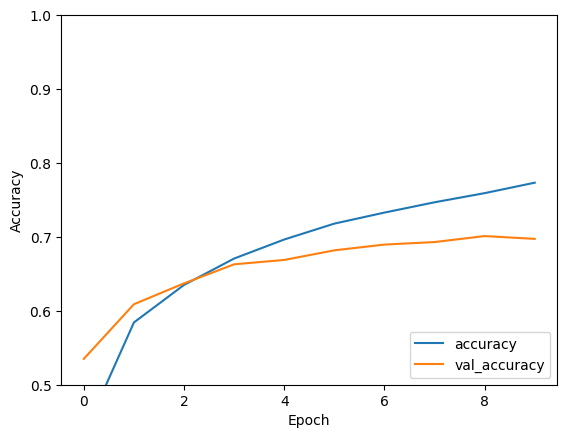

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


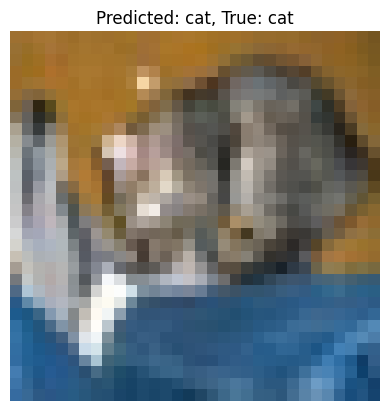

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Function to predict and display an image
def predict_image(model, image, true_label):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    prediction = model.predict(image[None, ...])
    predicted_class = class_names[tf.argmax(prediction[0])]
    true_class = class_names[true_label]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}, True: {true_class}")
    plt.axis('off')
    plt.show()

# Test the model on a sample image
sample_image = test_images[0]
sample_label = test_labels[0][0]
predict_image(model, sample_image, sample_label)
